In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Onde localizar os indicadores e seus códigos

https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [ ]:
def buscar_dados_bcb(codigo_serie, data_inicio, data_fim):

    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados"

    params = {
        'formato': 'json',
        'dataInicial': data_inicio,
        'dataFinal': data_fim
    }

    response = requests.get(url, params=params)
    
    if response.status_code == 200:

        dados = response.json()

        df = pd.DataFrame(dados)
        df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
        df['valor'] = pd.to_numeric(df['valor'], errors='coerce')
        return df
    
    else:
        
        print(f"Erro na requisição: {response.status_code}")

        return None

In [8]:
df_SELIC = buscar_dados_bcb(432, "01/01/2000", datetime.now().date().strftime('%d/%m/%Y'))

df_IPCA = buscar_dados_bcb(433, "01/02/1999", datetime.now().date().strftime('%d/%m/%Y'))

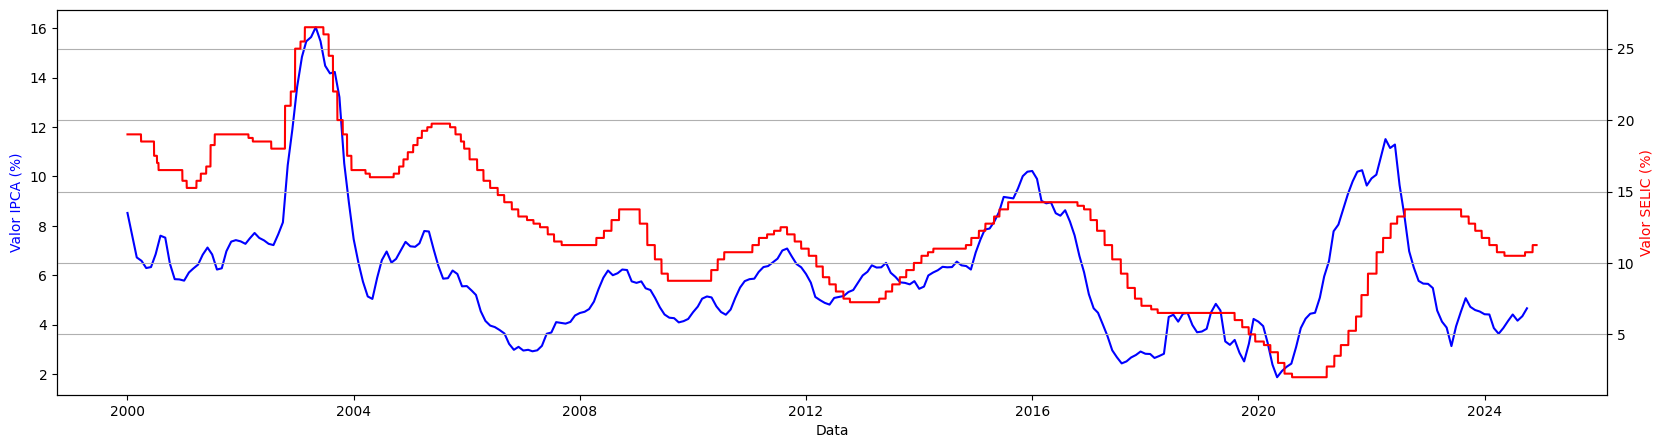

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(df_IPCA['data'], df_IPCA['valor'].rolling(window=12).sum(), color='blue')
ax1.set_xlabel("Data")
ax1.set_ylabel("Valor IPCA (%)", color='blue')

ax2 = ax1.twinx()
ax2.plot(df_SELIC['data'], df_SELIC['valor'], color='red')
ax2.set_xlabel("Data")
ax2.set_ylabel("Valor SELIC (%)", color='red')

plt.grid(True)

plt.show()